# ETL PROJECT -> League of Legends Database 🎮

In [1]:
# Importamos todas las librerías y recursos que necesitaremos

import numpy as np
import pandas as pd
import time

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import requests
from bs4 import BeautifulSoup

from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.by import By
PATH=ChromeDriverManager().install()

import warnings
warnings.filterwarnings('ignore')



In [82]:
# Cargamos el archivo csv y echamos el primer vistazo a nuestra base de datos extraída de un archivo .csv

df_champs = pd.read_csv('../data/League of Legends Champion Stats 12.1.csv', sep=';')

df_champs.head(3)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34


In [83]:
# Cambiamos el nombre de la primera columna, la cual nos servirá de ID. Así mismo cambiamos nombres acorde a nuestras
# necesidades a la hora de hacer merge.

df_champs.rename(columns={'Name':'campeon',
                          'Class':'tipo',
                          'Role':'rol',
                          'Win %':'winrate',
                          'Pick %':'pickrate',
                          'Ban %':'banrate'
                         }, inplace=True)

In [87]:
df_champs.head(1)

,campeon,tipo,rol,Tier,Score,Trend,winrate,Role %,pickrate,banrate,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97


In [84]:
import pylab as plt
import seaborn as sns
def check_nan(df: pd.DataFrame) -> None:
    
    
    
    nan_cols = df.isna().mean()  * 100  

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    

    plt.figure(figsize=(5, 3))  

    sns.heatmap(df.isna(),   
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();
    
    

'N nan cols: 1'

tipo    0.431034
dtype: float64

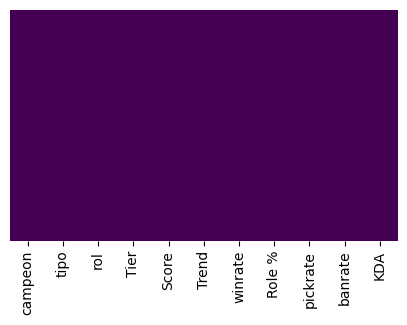

In [85]:
# Comprobamos si hay nulos

check_nan(df_champs)

In [88]:
# Eliminamos algunas columnas que no nos interesan de manera que nuestro df sea más manejable

df_champs = df_champs.drop(columns=['Score', 'Trend', 'Role %'])
df_champs.head()

,campeon,tipo,rol,Tier,winrate,pickrate,banrate,KDA
0,Aatrox,Fighter,TOP,A,49.97%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,49.93%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,48.59%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,48.57%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,51.46%,4.83%,21.91%,2.23


In [8]:
# En este punto, trataremos de enriquecer nuestro data frame a través del scarpeo.


**SCRAPEANDO RUNAS.RUN**

In [9]:
# Scrapeamos la web runas.run para completar información en nuestro df a través de Selenium.

In [10]:
# Inicializamos el driver para obtener los enlaces de todas las sub-páginas de las cuales queremos recoger los datos.

url = 'https://www.runas.run/'
driver=webdriver.Chrome(PATH)
driver.get(url)



In [11]:
# Mediante el siguiente bucle obtenemos los enlaces a scrapear.

links_runas = [driver.find_elements(By.TAG_NAME, 'a')[i].get_attribute('href') for i in range(len(driver.find_elements(By.TAG_NAME, 'a')))]
driver.quit()

In [12]:
# Limpiamos nuestra lista de enlaces, para quedarnos con los válidos.

links_runas = links_runas[67:-5]
links_runas_clean = [e for e in links_runas if 'corki' not in e]
links_runas_clean2 = [e for e in links_runas_clean if 'neeko' not in e]
links_runas_clean3 = [e for e in links_runas_clean2 if 'skarner' not in e]



In [ ]:
# Puesto que el proceso es lento y tedioso, aprovechamos todos los recursos de nuestra máquina para 
# hacerlo más eficiente.

In [21]:
import multiprocessing as mp
from multiprocessing import get_context
from funcion import *                      # Documento .py externo donde almaceno las funciones para poder hacer el map
                                           # RUTA: ETL-Project/src/funcion.py
pool = mp.Pool(mp.cpu_count())             # Le decimos a la máquina que utilice todos los núcleos de la CPU.



In [16]:
# Aplicamos mediante el método map nuestra funcion iterando sobre los links que extraimos previamente.

data_champs = pool.map(extraer_datos, links_runas_clean3)

In [20]:
data_champs[:2]

[{'campeon': 'Aatrox',
  'fuerte': 'Gwen Akali Sion Nasus Yorick',
  'debil': 'Rengar Jayce Fiora Gnar Shen',
  'hechizos': 'Destello Prender',
  'obj_ini': 'Espada de Doran Poción de vida',
  'item_1': 'Botas blindadas',
  'item_2': 'Cuchilla negra',
  'item_3': 'Guantelete de hielo',
  'item_4': 'Rencor de Serylda',
  'item_5': 'Baile de la muerte',
  'item_6': 'Ángel de la guarda'},
 {'campeon': 'Ahri',
  'fuerte': 'Azir Akali Ryze Veigar Orianna',
  'debil': 'Annie Zoe Fizz Zed Lux',
  'hechizos': 'Destello Prender',
  'obj_ini': 'Anillo de Doran Poción de vida',
  'item_1': 'Tempestad de Luden',
  'item_2': 'Botas de hechicero',
  'item_3': 'Llamasombría',
  'item_4': 'Sombrero mortal de Rabadon',
  'item_5': 'Velo del hada de la muerte',
  'item_6': 'Reloj de arena de Zhonya'}]

In [19]:
# Creamos un df con nuestros datos para hacer merge más tarde con el principal.

df_champs2 = pd.DataFrame(data_champs) 
df_champs2.head()

,campeon,fuerte,debil,hechizos,obj_ini,item_1,item_2,item_3,item_4,item_5,item_6
0,Aatrox,Gwen Akali Sion Nasus Yorick,Rengar Jayce Fiora Gnar Shen,Destello Prender,Espada de Doran Poción de vida,Botas blindadas,Cuchilla negra,Guantelete de hielo,Rencor de Serylda,Baile de la muerte,Ángel de la guarda
1,Ahri,Azir Akali Ryze Veigar Orianna,Annie Zoe Fizz Zed Lux,Destello Prender,Anillo de Doran Poción de vida,Tempestad de Luden,Botas de hechicero,Llamasombría,Sombrero mortal de Rabadon,Velo del hada de la muerte,Reloj de arena de Zhonya
2,Akali,Ekko Viktor Yasuo Vladimir Yone,Annie Jayce Qiyana Zoe Pantheon,Destello Prender,Escudo de Doran Poción de vida,Botas de hechicero,Cintomisil hextech,Llamasombría,Reloj de arena de Zhonya,Sombrero mortal de Rabadon,Bastón del Vacío
3,Akshan,Azir Yone Orianna Tristana Malzahar,Annie Pantheon Yasuo Vex Anivia,Destello Prender,Espada larga Poción reutilizable,Verdugo de krakens,Botas de mercurio,Final del ingenio,Cañón de fuego rápido,Hoja de furia de Guinsoo,Ángel de la guarda
4,Alistar,Yuumi Xerath Braum Blitzcrank Pyke,Taric Renata Glasc Rakan Swain Maokai,Destello Prender,Poción de vida Escudo reliquia,Botas de movilidad,Medallón de los Solari de Hierro,Malla de espinas,Piedra de guardianes atenta,Promesa de caballero,Bailarín espectral


**EXTRACCIÓN DE RUNAS**

In [ ]:
# Seguiremos un proceso similar al anterior esta vez para obtener la información de configuración de runas de nuestro
# personaje.

# El método empleado será el scrapeo con BeautifulSoup, ya que selenium no era capaz de sacar el dato.
# Una vez más la función a la que recurriremos para ello se encuentra almacenada en el anteriormente 
# mencionado funciones.py

In [22]:
data_runas = pool.map(extraer_runas, links_runas_clean3)

In [23]:
data_runas[:5]

[{'campeon': 'Aatrox',
  'runas': 'Conquistador, Triunfo, Leyenda: Tenacidad, Último esfuerzo, Revestimiento de huesos, Revitalizar, Conquistador,'},
 {'campeon': 'Ahri',
  'runas': 'Electrocutar, Sabor a sangre, Colección de globos oculares, Cazador definitivo, Banda de maná, Trascendencia, Electrocutar,'},
 {'campeon': 'Akali',
  'runas': 'Conquistador, Claridad mental, Leyenda: Tenacidad, Golpe de gracia, Fuerzas renovadas, Sobrecrecimiento, Conquistador,'},
 {'campeon': 'Akshan',
  'runas': 'Ataque intensificado, Claridad mental, Leyenda: Presteza, Golpe de gracia, Golpe de escudo, Revestimiento de huesos, Ataque intensificado,'},
 {'campeon': 'Alistar',
  'runas': 'Reverberacción, Fuente de vida, Revestimiento de huesos, Inquebrantable, Destello hextech, Perspicacia cósmica, Mejora glacial,'}]

In [24]:
df_runas = pd.DataFrame(data_runas)
df_runas.head()

,campeon,runas
0,Aatrox,"Conquistador, Triunfo, Leyenda: Tenacidad, Últ..."
1,Ahri,"Electrocutar, Sabor a sangre, Colección de glo..."
2,Akali,"Conquistador, Claridad mental, Leyenda: Tenaci..."
3,Akshan,"Ataque intensificado, Claridad mental, Leyenda..."
4,Alistar,"Reverberacción, Fuente de vida, Revestimiento ..."


**SCRAPEO RIOT API**

In [ ]:
# Es interesante incluir en mi base de datos, la rotación de campeones semanales. Es decir, los personajes con los que
# es posible jugar sin necesidad de tenerlos comprados.

In [25]:
# Hacemos la petición a la API a través de este enlace en el que se incluye un token, el cual caducará en 24h.
# Esto quiere decir que para mantener actualizada esta parte de la bd, habrá que logearse semanalmente.

url = 'https://euw1.api.riotgames.com/lol/platform/v3/champion-rotations?api_key='
res = requests.get(url)

res

<Response [200]>

In [26]:
free_champs = res.json()['freeChampionIds']
free_champs

[10, 11, 40, 54, 85, 91, 102, 107, 126, 143, 200, 245, 246, 518, 523, 895]

In [ ]:
# La anterior lista arroja una serie de identificadores los cuales se relacionan con campeones de nuestro videojuego.
# La propia API, no nos da información acerca de esta relación, por lo que habrá que buscarla de manera externa.

In [99]:
# Creamos una lista con la palabra disponible en el rango de nuestra lista de campeones gratis.

disponibilidad = ['disponible' for e in range(len(free_champs))]

In [100]:
# Preparamos los datos para convertirlos en un df, pues será una de nuestras tablas en SQL.

data_disponibilidad = {'riot_id':free_champs,
                       'disponibilidad':disponibilidad}

In [101]:
df_disp = pd.DataFrame(data_disponibilidad)
df_disp.head(3)

,riot_id,disponibilidad
0,10,disponible
1,11,disponible
2,40,disponible


In [27]:
# Esta URL nos da la info que nos falta. Simplemente hay que limpiarla y filtrarla.

url = 'http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/champion.json'

res = requests.get(url)

In [28]:
# Nos damos cuenta de que cada key corresponde a un campeon de nuestro juego. 

dictio = res.json()['data']
dictio.keys()

dict_keys(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'FiddleSticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'Leblanc', 'LeeSin', 'Leona', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Pantheon', 'Poppy', 'Quinn', 'Rammus', 'RekSai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Sejuani', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 

In [29]:
# Dentro de cada key encontramos el valor que nos interesa, en este caso el valor de la clave 'key'. 
# Lo extraeremos para cada campeon con su nombre asociado ('id') para poder hacer el merge más tarde.

dictio['Aatrox']

{'version': '6.24.1',
 'id': 'Aatrox',
 'key': '266',
 'name': 'Aatrox',
 'title': 'the Darkin Blade',
 'blurb': "Aatrox is a legendary warrior, one of only five that remain of an ancient race known as the Darkin. He wields his massive blade with grace and poise, slicing through legions in a style that is hypnotic to behold. With each foe felled, Aatrox's ...",
 'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
 'image': {'full': 'Aatrox.png',
  'sprite': 'champion0.png',
  'group': 'champion',
  'x': 0,
  'y': 0,
  'w': 48,
  'h': 48},
 'tags': ['Fighter', 'Tank'],
 'partype': 'BloodWell',
 'stats': {'hp': 537.8,
  'hpperlevel': 85.0,
  'mp': 105.6,
  'mpperlevel': 45.0,
  'movespeed': 345.0,
  'armor': 24.384,
  'armorperlevel': 3.8,
  'spellblock': 32.1,
  'spellblockperlevel': 1.25,
  'attackrange': 150.0,
  'hpregen': 6.59,
  'hpregenperlevel': 0.5,
  'mpregen': 0.0,
  'mpregenperlevel': 0.0,
  'crit': 0.0,
  'critperlevel': 0.0,
  'attackdamage': 60.376,
  'attack

In [31]:
# Mediante las siguientes lineas de código construimos nuestro df. Una vez más, lo construimos con orientación a 
# hacer merge con nuestro principal.

nombres = [v['id'] for v in dictio.values()]
ids = [v['key'] for v in dictio.values()]

In [32]:
data_ids = {'campeon':nombres,
            'riot_id':ids}

In [33]:
df_ids = pd.DataFrame(data_ids)
df_ids.head()

,campeon,riot_id
0,Aatrox,266
1,Ahri,103
2,Akali,84
3,Alistar,12
4,Amumu,32


In [ ]:
# Aunque esta información no está del todo actualizada, si que jugará un papel imprescidible en la utilidad 
# de nuestra bd

**CONSTRUCCIÓN TABLA CAMPEONES**

In [ ]:
# Para contruir nuestro df definitivo y hacerlo operativo, deberemos mergear cada uno de los df que contruimos tanto
# del resultado de scrapear webs o Apis, como del archivo .csv

In [64]:
# Unimos df de runas con df de id de campeones obtenidos de la API
df_1 = pd.merge(df_runas, df_ids, on = 'campeon', how = 'left')
df_1.head()

,campeon,runas,riot_id
0,Aatrox,"Conquistador, Triunfo, Leyenda: Tenacidad, Últ...",266
1,Ahri,"Electrocutar, Sabor a sangre, Colección de glo...",103
2,Akali,"Conquistador, Claridad mental, Leyenda: Tenaci...",84
3,Akshan,"Ataque intensificado, Claridad mental, Leyenda...",NaN
4,Alistar,"Reverberacción, Fuente de vida, Revestimiento ...",12


In [65]:
# Unimos el resultante con df obtenido del scrapeo de webs
df = pd.merge(df_champs2, df_1, on='campeon', how='right')
df.head()

,campeon,fuerte,debil,hechizos,obj_ini,item_1,item_2,item_3,item_4,item_5,item_6,runas,riot_id
0,Aatrox,Gwen Akali Sion Nasus Yorick,Rengar Jayce Fiora Gnar Shen,Destello Prender,Espada de Doran Poción de vida,Botas blindadas,Cuchilla negra,Guantelete de hielo,Rencor de Serylda,Baile de la muerte,Ángel de la guarda,"Conquistador, Triunfo, Leyenda: Tenacidad, Últ...",266
1,Ahri,Azir Akali Ryze Veigar Orianna,Annie Zoe Fizz Zed Lux,Destello Prender,Anillo de Doran Poción de vida,Tempestad de Luden,Botas de hechicero,Llamasombría,Sombrero mortal de Rabadon,Velo del hada de la muerte,Reloj de arena de Zhonya,"Electrocutar, Sabor a sangre, Colección de glo...",103
2,Akali,Ekko Viktor Yasuo Vladimir Yone,Annie Jayce Qiyana Zoe Pantheon,Destello Prender,Escudo de Doran Poción de vida,Botas de hechicero,Cintomisil hextech,Llamasombría,Reloj de arena de Zhonya,Sombrero mortal de Rabadon,Bastón del Vacío,"Conquistador, Claridad mental, Leyenda: Tenaci...",84
3,Akshan,Azir Yone Orianna Tristana Malzahar,Annie Pantheon Yasuo Vex Anivia,Destello Prender,Espada larga Poción reutilizable,Verdugo de krakens,Botas de mercurio,Final del ingenio,Cañón de fuego rápido,Hoja de furia de Guinsoo,Ángel de la guarda,"Ataque intensificado, Claridad mental, Leyenda...",NaN
4,Alistar,Yuumi Xerath Braum Blitzcrank Pyke,Taric Renata Glasc Rakan Swain Maokai,Destello Prender,Poción de vida Escudo reliquia,Botas de movilidad,Medallón de los Solari de Hierro,Malla de espinas,Piedra de guardianes atenta,Promesa de caballero,Bailarín espectral,"Reverberacción, Fuente de vida, Revestimiento ...",12


In [89]:
# Hacemos merge con nuestro df origen para contruir el df definitivo.

lol = pd.merge(df_champs, df, on='campeon', how='left')
lol.head()

,campeon,tipo,rol,Tier,winrate,pickrate,banrate,KDA,fuerte,debil,hechizos,obj_ini,item_1,item_2,item_3,item_4,item_5,item_6,runas,riot_id
0,Aatrox,Fighter,TOP,A,49.97%,4.43%,2.03%,1.97,Gwen Akali Sion Nasus Yorick,Rengar Jayce Fiora Gnar Shen,Destello Prender,Espada de Doran Poción de vida,Botas blindadas,Cuchilla negra,Guantelete de hielo,Rencor de Serylda,Baile de la muerte,Ángel de la guarda,"Conquistador, Triunfo, Leyenda: Tenacidad, Últ...",266
1,Ahri,Mage,MID,A,49.93%,4.62%,1.04%,2.56,Azir Akali Ryze Veigar Orianna,Annie Zoe Fizz Zed Lux,Destello Prender,Anillo de Doran Poción de vida,Tempestad de Luden,Botas de hechicero,Llamasombría,Sombrero mortal de Rabadon,Velo del hada de la muerte,Reloj de arena de Zhonya,"Electrocutar, Sabor a sangre, Colección de glo...",103
2,Akali,Assassin,MID,S,48.59%,8.16%,12.88%,2.34,Ekko Viktor Yasuo Vladimir Yone,Annie Jayce Qiyana Zoe Pantheon,Destello Prender,Escudo de Doran Poción de vida,Botas de hechicero,Cintomisil hextech,Llamasombría,Reloj de arena de Zhonya,Sombrero mortal de Rabadon,Bastón del Vacío,"Conquistador, Claridad mental, Leyenda: Tenaci...",84
3,Akali,Assassin,TOP,A,48.57%,4.24%,12.88%,2.04,Ekko Viktor Yasuo Vladimir Yone,Annie Jayce Qiyana Zoe Pantheon,Destello Prender,Escudo de Doran Poción de vida,Botas de hechicero,Cintomisil hextech,Llamasombría,Reloj de arena de Zhonya,Sombrero mortal de Rabadon,Bastón del Vacío,"Conquistador, Claridad mental, Leyenda: Tenaci...",84
4,Akshan,Marksman,MID,S,51.46%,4.83%,21.91%,2.23,Azir Yone Orianna Tristana Malzahar,Annie Pantheon Yasuo Vex Anivia,Destello Prender,Espada larga Poción reutilizable,Verdugo de krakens,Botas de mercurio,Final del ingenio,Cañón de fuego rápido,Hoja de furia de Guinsoo,Ángel de la guarda,"Ataque intensificado, Claridad mental, Leyenda...",NaN


'N nan cols: 13'

tipo         0.431034
fuerte       3.448276
debil        3.448276
hechizos     3.448276
obj_ini      3.448276
item_1       3.448276
item_2       3.448276
item_3       3.448276
item_4       3.448276
item_5       3.448276
item_6       3.448276
runas        3.448276
riot_id     25.431034
dtype: float64

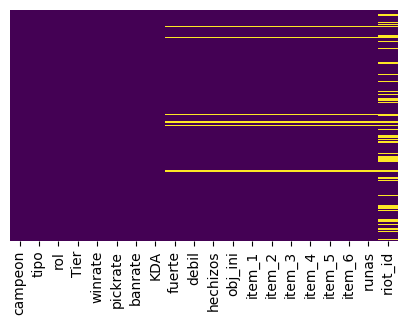

In [102]:
# Puesto que hemos hecho merge, probablemente se hayan generado bastantes valores nulos.
# Comprobamos si esto es verdad para poder limpiarlos.

check_nan(lol)

In [ ]:
# Puesto que la base de datos la he hecho yo, se perfectamente que los valores nulos son referentes a información 
# que no tenemos. Es por esto que decido rellenar con 'Unknown'.

In [103]:
lol.fillna('Unknown', inplace = True)

'N nan cols: 0'

Series([], dtype: float64)

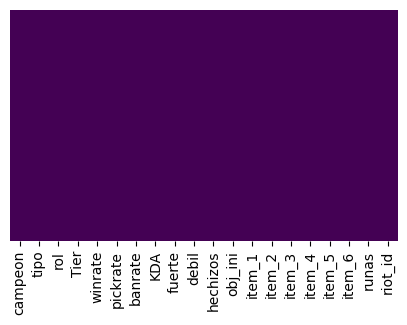

In [104]:
check_nan(lol)

In [ ]:
# Nuestro df está limpio

**TABLA OBJETOS**

In [ ]:
# Por otro lado me parece interesante crear una tabla con los objetos disponibles del juego y sus stats para su 
# consulta
# Se incluirá en la base de datos sin relacionarla con ninguna otra tabla.

In [90]:
url='https://www.mobachampion.com/es/item/'
driver=webdriver.Chrome(PATH)
driver.get(url)


In [91]:
data2 = driver.find_elements(By.TAG_NAME, 'td') 


In [92]:
# Limpiamos la información que nos llega en bruto
objeto_winrate3 = [e.text for e in data2 if e.text != '']
objeto_winrate3[:5]

['Botas', '36.2 %', '2.8 %', 'Amuleto de las hadas', '42.9 %']

In [93]:
# Filtramos para separar los tres campos que nos interesan

obj_name = objeto_winrate3[::3]
obj_name[:5]

['Botas',
 'Amuleto de las hadas',
 'Perla de rejuvenecimiento',
 'Cinturón de gigante',
 'Capa de agilidad']

In [94]:
obj_winrate = objeto_winrate3[1::3]
obj_winrate[:5]

['36.2 %', '42.9 %', '45.4 %', '48.3 %', '44.4 %']

In [95]:
obj_pickrate = objeto_winrate3[2::3]
obj_pickrate[:5]

['2.8 %', '0.6 %', '0.1 %', '3.7 %', '4.8 %']

In [96]:
# Creamos una lista con números hasta el rango de nuestro futuro df
obj_id = [i for i in range(len(obj_name))]
obj_id[:5]

[0, 1, 2, 3, 4]

In [97]:
# Preparamos los datos y nombres de columnas para generar por fin, el df.
obj_data = {'objeto_id': obj_id,
            'objeto':obj_name,
            'winrate':obj_winrate,
            'pickrate':obj_pickrate}

In [98]:
objetos = pd.DataFrame(obj_data)

objetos.head()

,objeto_id,objeto,winrate,pickrate
0,0,Botas,36.2 %,2.8 %
1,1,Amuleto de las hadas,42.9 %,0.6 %
2,2,Perla de rejuvenecimiento,45.4 %,0.1 %
3,3,Cinturón de gigante,48.3 %,3.7 %
4,4,Capa de agilidad,44.4 %,4.8 %


**EXPORTACIÓN A SQL**

In [ ]:
# A través del siguiente proceso, cargaremos nuestros datos extraidos de diversas fuentes ya limpios y ordenados 
# en nuestro servidor de SQL.
# A partir de este punto trabajaremos con la anteriormente mencionada herramienta a través de su interfaz gráfica 
# MySQL Workbench

# Con los datos cargados, haremos un reverse engineer para poder hacer las relaciones gráficamente. 
# En este mismo repositorio se pueden encontrar algunos ejemplos de querys, las cuales avalan el funcionamiento y la
# funcionalidad de nuestra bd.

In [105]:
from sqlalchemy import create_engine

str_conn = 'mysql+pymysql://{user}:{passwrd}@{host}/{database}'
cursor = create_engine(str_conn)

In [106]:
lol.to_sql(name='campeones', con=cursor, if_exists='replace', index=0)

232

In [108]:
df_disp.to_sql(name='disponibilidad', con=cursor, if_exists='replace', index=0)

16

In [109]:
objetos.to_sql(name='objetos', con=cursor, if_exists='replace', index=0)

205

**EXPORTACIÓN A .CSV**

In [1]:
# Por último exportaremos nuestros archivos ya limpios y listos para cargar a csv

In [3]:
lol.to_csv('../data/lol.csv', index=False)

In [ ]:
df_disp.to_csv('../data/disponibilidad.csv', index=False)

In [ ]:
objetos.to_csv('../data/objetos.csv', index=False)